In [1]:
# 셀 상의 변수 출력하는 환경 설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 12.4 CSV 데이터의 내용을 읽어 보자

In [2]:
# 교재의 코드
import csv

f = open('data/csv/weather.csv')  # CSV 파일을 열어서 f에 저장한다.
data = csv.reader(f)             # reader() 함수를 이용하여 읽는다.

print(data)
#for row in data:
#      print(row)

f.close()

In [3]:
with open('data/csv/weather.csv') as f:
    data = csv.reader(f)
    for i, row in enumerate(data):
        if i<5: print(row)
        else: break

['일시', '평균기온(°C)', '최대 풍속(m/s)', '평균 풍속(m/s)']
['2010-08-01', '28.7', '8.3', '3.4']
['2010-08-02', '25.2', '8.7', '3.8']
['2010-08-03', '22.1', '6.3', '2.9']
['2010-08-04', '25.3', '6.6', '4.2']


In [4]:
# Colab을 통해서 github의 정보를 읽어오기
# cp949 : 인코딩은 euc-kr의 확장 및 하위호환이다.
# UTF-8이 조합형 방식이라면, cp949는 완성형 방식이다.(ex, 가, 갸, 거,겨 형태로 표현)

import csv, urllib.request

url = 'https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/weather.csv'
response = urllib.request.urlopen(url)
lines = [l.decode('cp949') for l in response.readlines()]
cr = csv.reader(lines)

#for row in cr:
#    print(row)

In [5]:
import csv      

with open('data/csv/weather.csv') as f:
    data = csv.reader(f)
    header = next(data)
    for i, row in enumerate(data):
        if i<5: print(row)
        else: break

['2010-08-01', '28.7', '8.3', '3.4']
['2010-08-02', '25.2', '8.7', '3.8']
['2010-08-03', '22.1', '6.3', '2.9']
['2010-08-04', '25.3', '6.6', '4.2']
['2010-08-05', '27.2', '9.1', '5.6']


### 12.5 CSV에서 원하는 데이터 뽑아 보기

In [6]:
# 평균 풍속만 출력하고, 쉼표로 연결한다.
with open('data/csv/weather.csv') as f:
    data = csv.reader(f)
    header = next(data)
    for i, row in enumerate(data):
        if i<50:
            print(row[3], end=', ')
        else:
            break

3.4, 3.8, 2.9, 4.2, 5.6, 8, 5, 4, 3.1, 5.5, 4.8, 2.6, 4.6, 4.4, 10.3, 3.2, 1.6, 2.1, 1.9, 3.2, 4.2, 2.5, 6.2, 3, 1.9, 2.5, 1.6, 2.3, 4.9, 6.2, 4.2, 2.6, 5.3, 1.7, 3.2, 3.3, 4.3, 7.6, 6.6, 2.5, 7.2, 3.8, 1.8, 3.9, 1.6, 2.2, 1.2, 2.2, 3, 3.5, 

In [7]:
with open('data/csv/weather.csv') as f:
    data = csv.reader(f)
    header = next(data)

    max_wind = 0.0

    for row in data:                    # 반복 루프를 사용하여 데이터를 읽는다.
        if row[3] == '':             # 평균 풍속 데이터가 없는 경우 0을 처리
            wind = 0
        else:
            wind = float(row[3])    # 평균 풍속 데이터를 실수로 변환해 저장
        if max_wind < wind:          # 최대 풍속을 갱신하는지 검사
            max_wind = wind         # 현재까지의 최대 풍속보다 크면 새로 기록

    print('지난 10년간 울릉도의 최대 풍속은 ', max_wind, 'm/s')

지난 10년간 울릉도의 최대 풍속은  14.9 m/s


### LAB 12-1 울릉도는 몇 월에 바람이 가장 강할까?

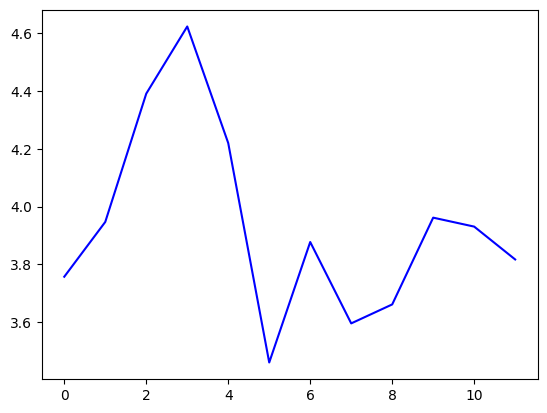

In [8]:
# 로컬 PC에서 코드 실행하기

import csv
import matplotlib.pyplot as plt 
 
f = open('data/csv/weather.csv')            # CSV 파일 열어 f에 저장 
data = csv.reader(f)                       # reader() 함수로 읽기
header = next(data)                        # 헤더를 제거

monthly_wind = [ 0 for x in range(12) ]    # 매달 풍속을 담을 리스트
days_counted = [ 0 for x in range(12) ]    # 각 달마다 측정된 일수

for row in data: 
    month = int(row[0][5:7])               # 0번 열에서 달 정보 추출, ex) 2010-08-11
    if row[3] !=  '' :                     # 풍속 데이터 존재하는지 확인
        wind = float(row[3])               # 풍속을 얻어 온다.
        monthly_wind[month-1] += wind      # 해당 달에 풍속 데이터 추가
        days_counted[month-1] += 1         # 해당 달의 일수를 증가

for i in range(12) :
      monthly_wind[i] /= days_counted[i]   # 일수로 나누어 월평균 구하기

plt.plot(monthly_wind, 'blue') 
plt.show()

f.close()                                  # 파일을 닫는다.

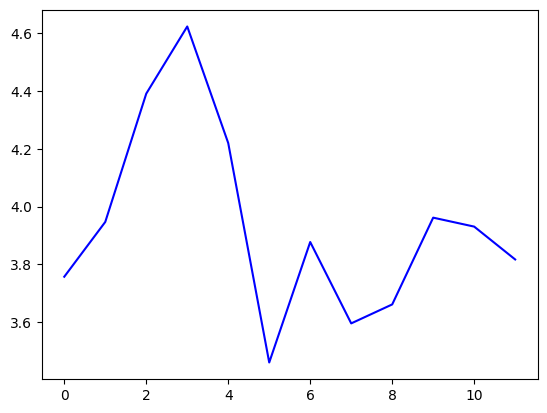

In [9]:
# 코랩에서 실행하는 방법

import csv
import matplotlib.pyplot as plt 

url = 'https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/weather.csv'
response = urllib.request.urlopen(url)
lines = [l.decode('cp949') for l in response.readlines()]
data = csv.reader(lines)
header = next(data)               # 헤더를 제거한다. 

monthly_wind = [ 0 for x in range(12) ]    # 매달 풍속을 담을 리스트
days_counted = [ 0 for x in range(12) ]    # 각 달마다 측정된 일수

for row in data: 
    month = int(row[0][5:7])               # 0번 열에서 달 정보 추출
    if row[3] !=  '' :                     # 풍속 데이터 존재하는지 확인
        wind = float(row[3])               # 풍속을 얻어 온다.
        monthly_wind[month-1] += wind      # 해당 달에 풍속 데이터 추가
        days_counted[month-1] += 1         # 해당 달의 일수를 증가

for i in range(12) :
      monthly_wind[i] /= days_counted[i]

plt.plot(monthly_wind, 'blue') 
plt.show()


In [10]:
import numpy as np
import pandas as pd

In [11]:
series = pd.Series([1, 3, 4, np.nan, 6, 8])
series

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [12]:
series.values
series.index

array([ 1.,  3.,  4., nan,  6.,  8.])

RangeIndex(start=0, stop=6, step=1)

### 12.7 판다스로 데이터 파일을 읽기

In [13]:
# 로컬 컴퓨터의 csv 파일 읽기 코드 - 코랩에서는 오류 발생
import pandas as pd
df = pd.read_csv('data/csv/countries.csv')
df
print(type(df))

,Unnamed: 0,country,area,capital,population
0,KR,Korea,98480,Seoul,51780579
1,US,USA,9629091,Washington,331002825
2,JP,Japan,377835,Tokyo,125960000
3,CN,China,9596960,Beijing,1439323688
4,RU,Russia,17100000,Moscow,146748600


<class 'pandas.core.frame.DataFrame'>


In [14]:
import csv

f = open('data/csv/countries.csv')            # CSV 파일 열어 f에 저장 
data = csv.reader(f)                       # reader() 함수로 읽기
print(type(data))

<class '_csv.reader'>


In [15]:
'''
# 판다스를 통해서 countries 데이터 읽기
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/countries.csv')
'''

"\n# 판다스를 통해서 countries 데이터 읽기\nimport pandas as pd\ndf = pd.read_csv('https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/countries.csv')\n"

### 12.8 인덱스와 컬럼스 객체

In [16]:
import pandas as pd 

df = pd.read_csv('data/csv/countries.csv', index_col = 0)
df

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


### 12.9 열을 기준으로 데이터 선택하기

In [17]:
import pandas as pd 

df_my_index = pd.read_csv('data/csv/countries.csv', index_col = 0)
print(df_my_index[ ['area','population'] ])
print('\n')

df_no_index = pd.read_csv('data/csv/countries.csv')
print(df_no_index['population'])

        area  population
KR     98480    51780579
US   9629091   331002825
JP    377835   125960000
CN   9596960  1439323688
RU  17100000   146748600


0      51780579
1     331002825
2     125960000
3    1439323688
4     146748600
Name: population, dtype: int64


In [18]:
import pandas as pd 

df_my_index = pd.read_csv('data/csv/countries.csv', index_col = 0)
print(df_my_index[ ['area', 'population'] ])

        area  population
KR     98480    51780579
US   9629091   331002825
JP    377835   125960000
CN   9596960  1439323688
RU  17100000   146748600


### 12.10 데이터 가시화하기

<AxesSubplot: >

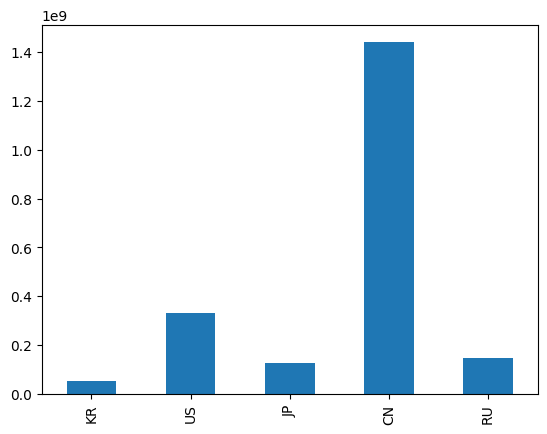

<AxesSubplot: ylabel='area'>

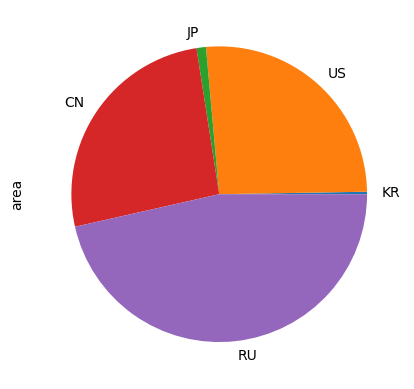

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 

countries_df = pd.read_csv('data/csv/countries.csv', index_col = 0)

countries_df['population'].plot(kind='bar')
plt.show()

countries_df['area'].plot(kind='pie')
plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 

weather_df = pd.read_csv('data/csv/weather.csv', index_col = 0, encoding='CP949')
weather_df

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


<AxesSubplot: ylabel='Frequency'>

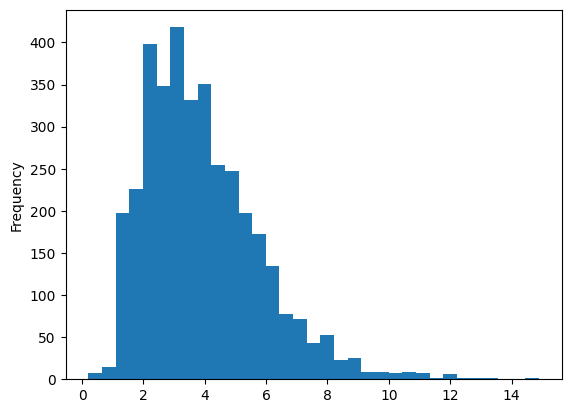

In [22]:
weather_df['평균 풍속(m/s)'].plot(kind='hist', bins=33)
plt.show()

### 12.10 행 선택하기

In [23]:
weather_df[:10]

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
2010-08-06,26.8,9.8,8.0
2010-08-07,27.5,9.1,5.0
2010-08-08,26.6,5.9,4.0
2010-08-09,26.9,5.1,3.1


In [24]:
weather_df.head()

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [25]:
countries_df.loc['KR', 'capital']
countries_df.iloc[0, 2]

'Seoul'

'Seoul'

In [26]:
weather_df.tail()

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0
2020-07-30,22.9,9.7,2.4
2020-07-31,25.7,4.8,2.5


In [27]:
countries_df

,country,area,capital,population
KR,Korea,98480,Seoul,51780579
US,USA,9629091,Washington,331002825
JP,Japan,377835,Tokyo,125960000
CN,China,9596960,Beijing,1439323688
RU,Russia,17100000,Moscow,146748600


In [28]:
countries_df.loc['JP']

country           Japan
area             377835
capital           Tokyo
population    125960000
Name: JP, dtype: object

In [29]:
countries_df['population'][:3]

KR     51780579
US    331002825
JP    125960000
Name: population, dtype: int64

In [30]:
countries_df.loc['US', 'capital']
countries_df['capital'].loc['US']

'Washington'

'Washington'

### 12.12 새로운 열 생성하기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

countries_df = pd.read_csv('data/csv/countries.csv', index_col = 0)
countries_df['density'] = countries_df['population'] / countries_df['area']
print(countries_df)

   country      area     capital  population     density
KR   Korea     98480       Seoul    51780579  525.797918
US     USA   9629091  Washington   331002825   34.375293
JP   Japan    377835       Tokyo   125960000  333.373033
CN   China   9596960     Beijing  1439323688  149.977044
RU  Russia  17100000      Moscow   146748600    8.581789


### 12.11 간단히 데이터 분석하기

In [3]:
import pandas as pd
#df_weather = pd.read_csv('https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/weather.csv', 
#                         index_col = 0, encoding='CP949')
weather_df = pd.read_csv('data/csv/weather.csv', index_col = 0, encoding='CP949')
weather_df.describe()

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [4]:
weather_df.mean()
type(weather_df.mean())

평균기온(°C)      12.942102
최대 풍속(m/s)     7.911099
평균 풍속(m/s)     3.936441
dtype: float64

pandas.core.series.Series

In [5]:
weather_df.mean().values
weather_df.mean().index

array([12.94210238,  7.91109893,  3.93644091])

Index(['평균기온(°C)', '최대 풍속(m/s)', '평균 풍속(m/s)'], dtype='object')

In [6]:
print('평균 분석 -----------------------------')
print(weather_df.mean())
print('표준편차  분석 -----------------------------')
print(weather_df.std())

평균 분석 -----------------------------
평균기온(°C)      12.942102
최대 풍속(m/s)     7.911099
평균 풍속(m/s)     3.936441
dtype: float64
표준편차  분석 -----------------------------
평균기온(°C)      8.538507
최대 풍속(m/s)    3.029862
평균 풍속(m/s)    1.888473
dtype: float64


In [7]:
import numpy as np

pandas_std = weather_df['평균기온(°C)'].std()
numpy_std = np.std( weather_df['평균기온(°C)'] )
print(pandas_std, numpy_std)

8.53850701475343 8.537338236838877


### 12.21 데이터 집계 분석

In [8]:
#df = pd.read_csv('https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/weather.csv', 
#                 index_col = 0, encoding='CP949')

df = pd.read_csv('data/csv/weather.csv', index_col = 0, encoding='CP949')
df

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [9]:
df.count()

평균기온(°C)      3653
최대 풍속(m/s)    3649
평균 풍속(m/s)    3647
dtype: int64

In [10]:
df['최대 풍속(m/s)'].count()

3649

In [11]:
df[['최대 풍속(m/s)','평균 풍속(m/s)']].count()

최대 풍속(m/s)    3649
평균 풍속(m/s)    3647
dtype: int64

In [12]:
df.mean()
df[['최대 풍속(m/s)','평균 풍속(m/s)']].mean()

평균기온(°C)      12.942102
최대 풍속(m/s)     7.911099
평균 풍속(m/s)     3.936441
dtype: float64

최대 풍속(m/s)    7.911099
평균 풍속(m/s)    3.936441
dtype: float64

In [13]:
df.mean()
df.mean()[['최대 풍속(m/s)','평균 풍속(m/s)']]

평균기온(°C)      12.942102
최대 풍속(m/s)     7.911099
평균 풍속(m/s)     3.936441
dtype: float64

최대 풍속(m/s)    7.911099
평균 풍속(m/s)    3.936441
dtype: float64

### LAB 12-2 판다스로 울릉도의 바람 세기 분석하기

율릉도의 기상 데이터에 기록된 매일의 평균 풍속 데이터 바탕으로  
몇 월의 바람이 가장 강한지 분석하자.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

#weather = pd.read_csv('data/csv/weather.csv', index_col = 0, encoding='CP949') : 일시 -> index 되니 weather['일시']에 오류
weather = pd.read_csv('data/csv/weather.csv', encoding='CP949')

monthly = [ 0 for x in range(12) ]    # 달별로 구분된 12개의 데이터
monthly_wind = [ 0 for x in range(12) ]  # 각 달의 평균 풍속을 담을 리스트

weather

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [5]:
weather['일시']

0       2010-08-01
1       2010-08-02
2       2010-08-03
3       2010-08-04
4       2010-08-05
           ...    
3648    2020-07-27
3649    2020-07-28
3650    2020-07-29
3651    2020-07-30
3652    2020-07-31
Name: 일시, Length: 3653, dtype: object

In [35]:
# 일시 체크
pd.DatetimeIndex(weather['일시'])

pd.DatetimeIndex(weather['일시']).year
pd.DatetimeIndex(weather['일시']).month
pd.DatetimeIndex(weather['일시']).day

DatetimeIndex(['2010-08-01', '2010-08-02', '2010-08-03', '2010-08-04',
               '2010-08-05', '2010-08-06', '2010-08-07', '2010-08-08',
               '2010-08-09', '2010-08-10',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', name='일시', length=3653, freq=None)

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='일시', length=3653)

Int64Index([8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='일시', length=3653)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='일시', length=3653)

In [37]:
weather['month'] = pd.DatetimeIndex(weather['일시']).month
weather

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
0,2010-08-01,28.7,8.3,3.4,8
1,2010-08-02,25.2,8.7,3.8,8
2,2010-08-03,22.1,6.3,2.9,8
3,2010-08-04,25.3,6.6,4.2,8
4,2010-08-05,27.2,9.1,5.6,8
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,7
3649,2020-07-28,21.9,4.5,1.6,7
3650,2020-07-29,21.6,3.2,1.0,7
3651,2020-07-30,22.9,9.7,2.4,7


In [38]:
weather[ weather['month'] == 1 ]
monthly[0] = weather[ weather['month'] == 1 ] # 1월달 분리
monthly[0]['평균 풍속(m/s)'].mean()
#monthly[0].mean()['평균 풍속(m/s)']

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
153,2011-01-01,0.8,19.0,11.1,1
154,2011-01-02,0.1,8.5,6.0,1
155,2011-01-03,-0.3,10.2,6.5,1
156,2011-01-04,1.7,6.8,3.1,1
157,2011-01-05,1.2,6.9,4.1,1
...,...,...,...,...,...
3466,2020-01-27,5.4,15.3,7.6,1
3467,2020-01-28,5.7,14.9,11.6,1
3468,2020-01-29,4.1,9.0,6.6,1
3469,2020-01-30,1.8,10.2,7.7,1


3.7574193548387096

In [40]:
monthly[1] = weather[ weather['month'] == 2 ] # 2월달 분리
#monthly[1].mean()['평균 풍속(m/s)']
monthly[1]['평균 풍속(m/s)'].mean()

3.946785714285714

In [41]:
monthly[2] = weather[ weather['month'] == 3 ] # 3월달 분리
monthly[2]['평균 풍속(m/s)'].mean()

4.390291262135922

In [42]:
# 마지막에 해당 행의 데이터가 측정된 달을 기록한 열을 추가
weather['month'] = pd.DatetimeIndex(weather['일시']).month

for i in range(12):
    monthly[i] = weather[ weather['month'] == i+1 ] # 달별로 분리
    monthly_wind[i] = monthly[i]['평균 풍속(m/s)'].mean()  # 개별 데이터 분석
    
monthly_wind

[3.7574193548387096,
 3.946785714285714,
 4.390291262135922,
 4.62248322147651,
 4.219354838709678,
 3.461,
 3.8774193548387097,
 3.5961290322580637,
 3.6616666666666666,
 3.9616129032258067,
 3.930666666666666,
 3.817096774193548]

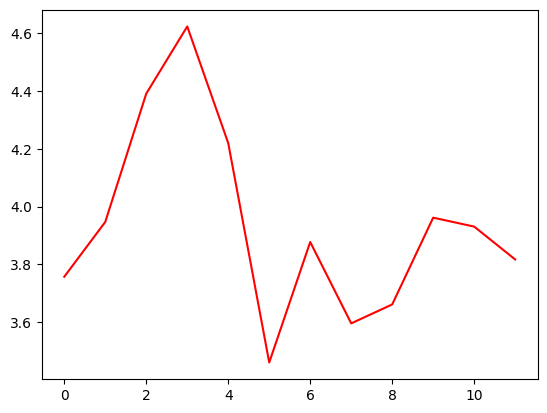

In [14]:
plt.plot(monthly_wind, 'red')
plt.show()

### 12.22 데이터 그룹핑

In [43]:
weather = pd.read_csv('data/csv/weather.csv', encoding='CP949')

weather['month'] = pd.DatetimeIndex(weather['일시']).month
weather.head()

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
0,2010-08-01,28.7,8.3,3.4,8
1,2010-08-02,25.2,8.7,3.8,8
2,2010-08-03,22.1,6.3,2.9,8
3,2010-08-04,25.3,6.6,4.2,8
4,2010-08-05,27.2,9.1,5.6,8


In [44]:
#means = weather.groupby('month').mean()
means = weather.groupby('month').mean(numeric_only=True)
means

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355
6,19.616667,6.945667,3.461000
7,23.328387,7.322581,3.877419
8,24.748710,6.853226,3.596129
9,20.323667,6.896333,3.661667


In [17]:
sum_data = weather.groupby('month').sum(numeric_only=True)
sum_data

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
month,,,
1,495.5,2529.0,1164.8
2,604.6,2303.1,1105.1
3,1937.6,2750.3,1356.6
4,3319.4,2782.2,1377.5
5,5134.9,2650.1,1308.0
6,5885.0,2083.7,1038.3
7,7231.8,2270.0,1202.0
8,7672.1,2124.5,1114.8
9,6097.1,2068.9,1098.5


### LAB 12-2 울릉도는 몇 월에 바람이 가장 강할까? - groupby 사용하기

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

weather = pd.read_csv('data/csv/weather.csv', encoding='CP949')

weather['month'] = pd.DatetimeIndex(weather['일시']).month
means = weather.groupby('month').mean(numeric_only=True)
means

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355
6,19.616667,6.945667,3.461000
7,23.328387,7.322581,3.877419
8,24.748710,6.853226,3.596129
9,20.323667,6.896333,3.661667


,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
month,,,
4,11.064667,9.305017,4.622483


<AxesSubplot: ylabel='month'>

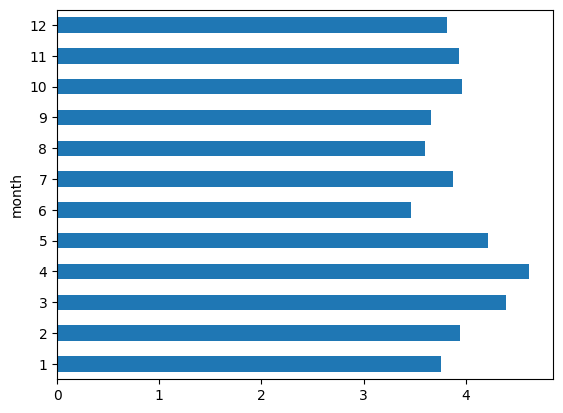

In [45]:
#x = means['평균 풍속(m/s)'].max()
means[ means['평균 풍속(m/s)'] == means['평균 풍속(m/s)'].max() ]

means['평균 풍속(m/s)'].plot(kind='barh')
plt.show()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### 12.13 필터링

In [46]:
weather

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
0,2010-08-01,28.7,8.3,3.4,8
1,2010-08-02,25.2,8.7,3.8,8
2,2010-08-03,22.1,6.3,2.9,8
3,2010-08-04,25.3,6.6,4.2,8
4,2010-08-05,27.2,9.1,5.6,8
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,7
3649,2020-07-28,21.9,4.5,1.6,7
3650,2020-07-29,21.6,3.2,1.0,7
3651,2020-07-30,22.9,9.7,2.4,7


In [47]:
weather['최대 풍속(m/s)'] >= 20.0

0       False
1       False
2       False
3       False
4       False
        ...  
3648    False
3649    False
3650    False
3651    False
3652    False
Name: 최대 풍속(m/s), Length: 3653, dtype: bool

In [48]:
weather[ weather['최대 풍속(m/s)'] >= 20.0 ]

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
261,2011-04-19,4.4,21.6,12.1,4
1850,2015-08-25,20.1,25.3,14.9,8
1851,2015-08-26,17.4,22.6,8.1,8
2988,2018-10-06,19.4,26.0,7.0,10
3339,2019-09-22,15.7,23.1,11.9,9
3340,2019-09-23,15.0,25.8,11.0,9
3447,2020-01-08,6.5,22.2,8.2,1


### 12.14 결손값 찾아 삭제하기 : isna(), dropna()

In [49]:
# isna() : 데이터에 결손값이 있는지를 확인하는 함수
weather['평균 풍속(m/s)'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3648    False
3649    False
3650    False
3651    False
3652    False
Name: 평균 풍속(m/s), Length: 3653, dtype: bool

In [50]:
weather[ weather['평균 풍속(m/s)'].isna() == True ]

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
559,2012-02-11,-0.7,NaN,NaN,2
560,2012-02-12,0.4,NaN,NaN,2
561,2012-02-13,4.0,NaN,NaN,2
1694,2015-03-22,10.1,11.6,NaN,3
1704,2015-04-01,7.3,12.1,NaN,4
3182,2019-04-18,15.7,11.7,NaN,4


In [51]:
weather[ weather['최대 풍속(m/s)'].isna() == True ]

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
559,2012-02-11,-0.7,NaN,NaN,2
560,2012-02-12,0.4,NaN,NaN,2
561,2012-02-13,4.0,NaN,NaN,2
3183,2019-04-19,7.8,NaN,2.3,4


In [52]:
import pandas as pd

weather = pd.read_csv('data/csv/weather.csv', encoding='CP949')
missing_data = weather [ weather['평균 풍속(m/s)'].isna() ] 
missing_data

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
559,2012-02-11,-0.7,NaN,NaN
560,2012-02-12,0.4,NaN,NaN
561,2012-02-13,4.0,NaN,NaN
1694,2015-03-22,10.1,11.6,NaN
1704,2015-04-01,7.3,12.1,NaN
3182,2019-04-18,15.7,11.7,NaN


In [54]:
# dropna : 빠진 값을 찾고 삭제하기 
weather.dropna(axis=0, how="any", inplace=True)

In [55]:
weather[ weather['평균 풍속(m/s)'].isna() == True ]

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)


In [56]:
weather[ weather['일시'] =='2012-02-12']

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)


### 12.15 결손값 보정하기 : fillna()

In [59]:
import pandas as pd

weather = pd.read_csv('data/csv/weather.csv', encoding='CP949')

weather.fillna(0, inplace = True)
weather[ weather['평균 풍속(m/s)'] == 0.0]

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
559,2012-02-11,-0.7,0.0,0.0
560,2012-02-12,0.4,0.0,0.0
561,2012-02-13,4.0,0.0,0.0
1694,2015-03-22,10.1,11.6,0.0
1704,2015-04-01,7.3,12.1,0.0
3182,2019-04-18,15.7,11.7,0.0


In [60]:
# inplace = False (Default) : 원본은 그대로 두고, 수정된 데이터프레임만 반환
weather = pd.read_csv('data/csv/weather.csv', encoding='CP949')

new_weather = weather.fillna(0)
weather[ weather['일시'] == '2012-02-11']
new_weather[ new_weather['일시'] == '2012-02-11']

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
559,2012-02-11,-0.7,NaN,NaN


,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
559,2012-02-11,-0.7,0.0,0.0


In [61]:
# 결손 데이터 (2012년 2월 11월의 풍속) 전체 데이터 평균으로 채움

weather.fillna( weather['평균 풍속(m/s)'].mean(), inplace = True)
weather[ weather['일시'] == '2012-02-11']

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
559,2012-02-11,-0.7,3.936441,3.936441


In [63]:
# 결손 데이터를 평균치로 채움

weather = pd.read_csv('data/csv/weather.csv', encoding='CP949')

weather['최대 풍속(m/s)'].fillna(weather['최대 풍속(m/s)'].mean(), inplace=True)
weather['평균 풍속(m/s)'].fillna(weather['평균 풍속(m/s)'].mean(), inplace=True)

weather[ weather['일시'] == '2012-02-11']

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
559,2012-02-11,-0.7,7.911099,3.936441


### 12.16 데이터 구조 변경 : pivot

In [4]:
import pandas as pd 

df_1 = pd.DataFrame({'item' : ['ring0', 'ring0', 'ring1', 'ring1'], 
                     'type' : ['Gold', 'Silver', 'Gold', 'Bronze'], 
                     'price': [20000, 10000, 50000, 30000]})

In [5]:
df_1

,item,type,price
0,ring0,Gold,20000
1,ring0,Silver,10000
2,ring1,Gold,50000
3,ring1,Bronze,30000


In [6]:
df_2 = df_1.pivot(index='item', columns='type', values='price') 
print(df_2)

type    Bronze     Gold   Silver
item                            
ring0      NaN  20000.0  10000.0
ring1  30000.0  50000.0      NaN


### 12.17 데이터프레임 합치기 - concat

In [26]:
df_1 = pd.DataFrame( {'A' : ['a10', 'a11', 'a12'], 
                      'B' : ['b10', 'b11', 'b12'],
                      'C' : ['c10', 'c11', 'c12']} , index = ['가', '나',  '다'] )

df_2 = pd.DataFrame( {'B' : ['b23', 'b24', 'b25'],
                      'C' : ['c23', 'c24', 'c25'],
                      'D' : ['d23', 'd24', 'd25']} , index = ['다', '라',  '마'] )

In [27]:
df_1

,A,B,C
가,a10,b10,c10
나,a11,b11,c11
다,a12,b12,c12


In [28]:
df_2

,B,C,D
다,b23,c23,d23
라,b24,c24,d24
마,b25,c25,d25


In [33]:
df_3 = pd.concat( [df_1, df_2])
#df_3

df_4 = pd.concat( [df_1, df_2], axis=1, join='inner')
df_4

,A,B,C,B,C,D
다,a12,b12,c12,b23,c23,d23


### LAB 12-1 다양한 방법으로 concat 적용해 보기

In [4]:
import pandas as pd 

df_1 = pd.DataFrame( {'A' : ['a10', 'a11', 'a12'], 
          'B' : ['b10', 'b11', 'b12'],
          'C' : ['c10', 'c11', 'c12']} , index = ['가', '나',  '다'] )

df_2 = pd.DataFrame( {'B' : ['b23', 'b24', 'b25'],
          'C' : ['c23', 'c24', 'c25'],
          'D' : ['d23', 'd24', 'd25']} , index = ['다', '라',  '마'] )

pd.concat( [df_1, df_2] , axis = 1, join = 'inner' )

,A,B,C,B,C,D
다,a12,b12,c12,b23,c23,d23


In [18]:
print( pd.concat( [df_1, df_2] , axis = 0, join = 'outer' ) )
print( pd.concat( [df_1, df_2] , axis = 0, join = 'inner' ) )
print( pd.concat( [df_1, df_2] , axis = 1, join = 'outer' ) )
print( pd.concat( [df_1, df_2] , axis = 1, join = 'inner' ) )

     A    B    C    D
가  a10  b10  c10  NaN
나  a11  b11  c11  NaN
다  a12  b12  c12  NaN
다  NaN  b23  c23  d23
라  NaN  b24  c24  d24
마  NaN  b25  c25  d25
     B    C
가  b10  c10
나  b11  c11
다  b12  c12
다  b23  c23
라  b24  c24
마  b25  c25
     A    B    C    B    C    D
가  a10  b10  c10  NaN  NaN  NaN
나  a11  b11  c11  NaN  NaN  NaN
다  a12  b12  c12  b23  c23  d23
라  NaN  NaN  NaN  b24  c24  d24
마  NaN  NaN  NaN  b25  c25  d25
     A    B    C    B    C    D
다  a12  b12  c12  b23  c23  d23


### 12.18 데이터베이스 join 방식의 데이터 병합 - merge

In [23]:
import pandas as pd 

df_1 = pd.DataFrame( {'A' : ['a10', 'a11', 'a12'], 
          'B' : ['b10', 'b11', 'b12'],
          'C' : ['c10', 'c11', 'c12']} , index = ['가', '나',  '다'] )

df_2 = pd.DataFrame( {'B' : ['b10', 'b11', 'b12'],
          'C' : ['c23', 'c24', 'c25'],
          'D' : ['d23', 'd24', 'd25']} , index = ['다', '라',  '마'] )

In [24]:
'''
df_3 = df_1.merge(df_2)
df_3

df_4 = df_1.merge(df_2, how='outer', on='B')
df_4

df_5 = df_1.merge(df_2, how='inner', on='B')
df_5

df_6 = df_1.merge(df_2, how='left', on='B')
df_6
'''

df_7 = df_1.merge(df_2, how='inner', on='B')
df_7

"\ndf_3 = df_1.merge(df_2)\ndf_3\n\ndf_4 = df_1.merge(df_2, how='outer', on='B')\ndf_4\n\ndf_5 = df_1.merge(df_2, how='inner', on='B')\ndf_5\n\ndf_6 = df_1.merge(df_2, how='left', on='B')\ndf_6\n"

,A,B,C_x,C_y,D
0,a10,b10,c10,c23,d23
1,a11,b11,c11,c24,d24
2,a12,b12,c12,c25,d25


### 12.18 인덱스를 키로 활용하여 merge 적용해 보기

In [25]:
df_1.merge(df_2, how ='outer', left_index = True, right_index = True )

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b23,c23,d23
라,NaN,NaN,NaN,b24,c24,d24
마,NaN,NaN,NaN,b25,c25,d25


In [31]:
df_3 = df_1.merge(df_2, how='outer', left_index = True, right_index = True)
df_3

df_4 = df_1.merge(df_2, how='inner', left_index = True, right_index = True)
df_4

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b23,c23,d23
라,NaN,NaN,NaN,b24,c24,d24
마,NaN,NaN,NaN,b25,c25,d25


,A,B_x,C_x,B_y,C_y,D
다,a12,b12,c12,b23,c23,d23


### LAB 12-1 다양한 방법으로 merge 적용해 보기

In [67]:
import pandas as pd 

df_1 = pd.DataFrame( {'A' : ['a10', 'a11', 'a12'], 
          'B' : ['b10', 'b11', 'b12'],
          'C' : ['c10', 'c11', 'c12']} , index = ['가', '나',  '다'] )

df_2 = pd.DataFrame( {'B' : ['b23', 'b24', 'b25'],
          'C' : ['c23', 'c24', 'c25'],
          'D' : ['d23', 'd24', 'd25']} , index = ['다', '라',  '마'] )

print('left outer \n' , df_1.merge(df_2, how='left', on='B' ) )
print('right outer \n' ,df_1.merge(df_2, how='right', on='B' ) )
print('full outer \n' ,df_1.merge(df_2, how='outer', on='B' ) )
print('inner \n' ,df_1.merge(df_2, how='inner', on='B' ) )

left outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer 
      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer 
      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []


### 12.19 정렬

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

countries_df = pd.read_csv('data/csv/countries.csv', index_col = 0)

print(countries_df)
print('\n')
sorted = countries_df.sort_values('area', ascending=False)
print(sorted)

   country      area     capital  population
KR   Korea     98480       Seoul    51780579
US     USA   9629091  Washington   331002825
JP   Japan    377835       Tokyo   125960000
CN   China   9596960     Beijing  1439323688
RU  Russia  17100000      Moscow   146748600


   country      area     capital  population
RU  Russia  17100000      Moscow   146748600
US     USA   9629091  Washington   331002825
CN   China   9596960     Beijing  1439323688
JP   Japan    377835       Tokyo   125960000
KR   Korea     98480       Seoul    51780579


In [35]:
countries_df = pd.read_csv('data/csv/countries.csv', index_col = 0)

countries_df.sort_values(['capital', 'area'], inplace = True)
print(countries_df)

   country      area     capital  population
CN   China   9596960     Beijing  1439323688
RU  Russia  17100000      Moscow   146748600
KR   Korea     98480       Seoul    51780579
JP   Japan    377835       Tokyo   125960000
US     USA   9629091  Washington   331002825


In [36]:
countries = pd.read_csv('../data/countries.csv', index_col = 0, encoding='CP949')
countries.sort_values(['population', 'area'], ascending = False, inplace = True)
print(countries)

   country      area     capital  population
CN   China   9596960     Beijing  1439323688
US     USA   9629091  Washington   331002825
RU  Russia  17100000      Moscow   146748600
JP   Japan    377835       Tokyo   125960000
KR   Korea     98480       Seoul    51780579


In [37]:
stations = pd.read_csv('data/csv/air_quality_stations.csv', index_col = 0)
stations.sort_values(['location'], ascending = False, inplace = True)
print(stations)

                            coordinates.latitude  coordinates.longitude
location                                                               
Tower Hamlets Roadside                  51.52253               -0.04216
Thurrock                                51.47707                0.31797
Southwark A2 Old Kent Road              51.48050               -0.05955
Southend-on-Sea                         51.54420                0.67841
London Westminster                      51.49467               -0.13193
...                                          ...                    ...
BELR833                                 51.32766                4.36226
BELLD02                                 51.12038                5.02155
BELLD01                                 51.10998                5.00486
BELHB23                                 51.17030                4.34100
BELAL01                                 51.23619                4.38522

[66 rows x 2 columns]
